In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as symp
from sympy import vector
from scipy import signal
from sympy import Piecewise

In [2]:
%matplotlib widget

In [3]:
# Define the symbols.
x, y, z, t = symp.symbols('x y z t')
k, m, n = symp.symbols('k m n', integer=True)


In [4]:
# Q1: Define the function
#15 marks
C = vector.CoordSys3D('C')
fx = C.x**2 + C.x * C.y + C.y**2 + C.z

In [5]:
# find the gradient
# Q1 a) 
v = vector.gradient(fx)
v

(2*C.x + C.y)*C.i + (C.x + 2*C.y)*C.j + C.k

**Q1 b)** Then, we calculate the line integral along (0,0,0) -> (1,0,0) -> (1,1,0) -> (1,1,1).
To do this, we'll divide the path into three separate parts:

l1: integrate from x = 0 -> 1. dy = dz = 0, y = z = 0.

l2: integrate from y = 0 -> 1. dx = dz = 0, x = 1, z = 0

l3: integrate from z = 0 -> 1. dx = dy = 0, x, y = 1


In [6]:
ds1 = C.i
ds2 = C.j
ds3 = C.k

I1 = symp.integrate(v.dot(ds1).subs(C.y,0),(C.x,0,1))
I2 = symp.integrate(v.dot(ds2).subs({C.z:0, C.x:1}),(C.y,0,1))
I3 = symp.integrate(v.dot(ds3),(C.z,0,1))

In [7]:
print(I1, I2, I3)
print("Total Integral ", I1 + I2 + I3)

1 2 1
Total Integral  4


Along the second path:

l1: integrate from y = 0 -> 1. x = z = 0, dx = dz = 0.

l2: integrate from x = 0 -> 1. y = 1, z = 0, dy = dz = 0.

l3: integrate from z = 0 -> 1. x = y = 1, dx = dy = 0.

In [8]:
ds1 = C.j
ds2 = C.i
ds3 = C.k

I1 = symp.integrate(v.dot(ds1).subs(C.x,0),(C.y,0,1))
I2 = symp.integrate(v.dot(ds2).subs({C.z:0,C.y:1}),(C.x,0,1))
I3 = symp.integrate(v.dot(ds3),(C.z,0,1))

In [9]:
print(I1,I2,I3)
print("Total Integral", I1 + I2 + I3)

1 2 1
Total Integral 4


Along the last path, $ds = dx\hat{i} + dy\hat{j} + dz\hat{k}$.

We also know x = y = z, so dx = dy = dz, and we are integrating from 0 to 1.

In [10]:
ds = C.i + C.j + C.k

expr = v.dot(ds)
print(expr)
I = symp.integrate(expr.subs(C.y,C.x),(C.x,0,1))
print(I)

3*C.x + 3*C.y + 1
4


In [11]:
# The integral seems to be path independent. We can check this:
symp.vector.curl(v)
# As expected, the curl is 0 for a vector that is the gradient of a scalar function,
# and the integral is independent of the path.

0

**Q1c)** Now we will repeat the same integrals for the function $\vec{u} = (x-y)\hat{i} + (x +y)\hat{j} + z\hat{k}$.

In [12]:
v2 = (x - y) * C.i + (x + y) * C.j + z * C.k
ds1 = C.i
ds2 = C.j
ds3 = C.k

I1 = symp.integrate(v2.dot(ds1).subs(y,0),(x,0,1))
I2 = symp.integrate(v2.dot(ds2).subs({z:0,x:1}),(y,0,1))
I3 = symp.integrate(v2.dot(ds3),(z,0,1))
print(I1, I2, I3)
print(I1 + I2 + I3)

1/2 3/2 1/2
5/2


In [13]:
ds1 = C.j
ds2 = C.i
ds3 = C.k

I1 = symp.integrate(v2.dot(ds1).subs(x,0),(y,0,1))
I2 = symp.integrate(v2.dot(ds2).subs(z,0).subs(y,1),(x,0,1))
I3 = symp.integrate(v2.dot(ds3),(z,0,1))
print(I1, I2, I3)
print(I1 + I2 + I3)

1/2 -1/2 1/2
1/2


In [14]:
ds = C.i + C.j + C.k

expr = v2.dot(ds)
I = symp.integrate(expr.subs({y:x,z:x}),(x,0,1))
print(I)

3/2


**Question 2 and 3**: Calculate the integral
$$
\oint_S \vec{r}\cdot d\vec{\sigma}
$$
where $\vec{r} = x\hat{i} + y\hat{j} + z\hat{k}$ and $S$ is the surface of a unit cube.
(5 marks each) 

In [15]:
cube = vector.ParametricRegion((x,y,z),(x,0,1),(y,0,1),(z,0,1))
r = C.x * C.i + C.y * C.j + C.z * C.k
r

C.x*C.i + C.y*C.j + C.z*C.k

In [16]:
vector.vector_integrate(vector.divergence(r),cube)

3

In [17]:
# On sympy live, the parametric region command doesn't work, so we have to do the integrals manually.

#side 1: in y-z plane at x = 0:
ds1 = -C.i
Side1 = r.dot(ds1).subs(C.x,0)
print(Side1)
# side 2: in y-z plane at x = 1
ds2 = C.i
Side2 = r.dot(ds2).subs(C.x,1)
print(Side2)
#side 3: in x-y plane at z = 0
ds3 = -C.k
Side3 = r.dot(ds3).subs(C.z, 0)
print(Side3)
#side4: in x-y plane at z = 1
ds4 = C.k
Side4 = r.dot(ds4).subs(C.z, 1)
print(Side4)
# side 5: in x-z plane at y = 0
ds5 = -C.j
Side5 = r.dot(ds5).subs(C.y, 0)
print(Side5)
# side 6: in x-z plane at y = 1
ds6 = C.j
Side6 = r.dot(ds6).subs(C.y,1)
print(Side6)

0
1
0
1
0
1


Each side ends up giving a constant, which is then integrated over the surface of that side = the area of the side. Since the cube has sides of area 1:

In [18]:
area = symp.integrate(symp.integrate(1,(x,0,1)),(y,0,1))
print("Area = ", area)
#total result is
print("Surface integral = ",(Side1 + Side2 + Side3  + Side4 + Side5 + Side6)*area)

Area =  1
Surface integral =  3


According to the divergence theorem, this is equal to the volume integral of $\vec{\nabla}\cdot\vec{r}$:

In [19]:
Volume = symp.integrate(area,(z,0,1))
print(vector.divergence(r))
# Since the divergence is constant, we multiply by the volume integral
print("Volume Integral = ", vector.divergence(r) * Volume)

3
Volume Integral =  3


and so the integral is 3, as we found using the surface integrals.

**Question 4:**

(6 marks)

We can generate a sawtooth wave using the scipy signal package.

<IPython.core.display.Javascript object>


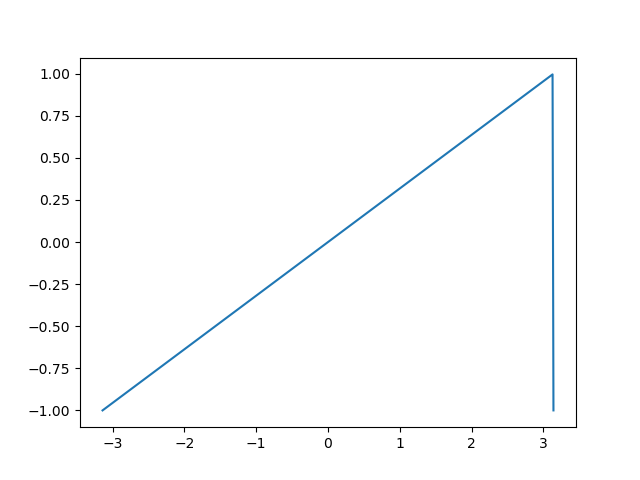

In [20]:
t = np.linspace(-np.pi, np.pi, 500)
saw = signal.sawtooth( t+np.pi)
plt.figure()
plt.plot(t,saw)


In [21]:
# now find the Fourier series
f = Piecewise((x + symp.pi, abs(x) <= symp.pi),(0,abs(x) > symp.pi))

s = symp.fourier_series(f,(x,-symp.pi,symp.pi) )
s.truncate(5)


2*sin(x) - sin(2*x) + 2*sin(3*x)/3 - sin(4*x)/2 + pi

In [22]:
s.a0

pi

In [23]:
s.an

SeqFormula(Piecewise((2*pi*sin(_n*pi)/_n, (_n > -oo) & (_n < oo) & Ne(_n, 0)), (2*pi**2, True))*cos(_n*x)/pi, (_n, 1, oo))

In [24]:
s.bn

SeqFormula(Piecewise((-2*pi*cos(_n*pi)/_n + 2*sin(_n*pi)/_n**2, (_n > -oo) & (_n < oo) & Ne(_n, 0)), (0, True))*sin(_n*x)/pi, (_n, 1, oo))